# Rice Crop disease identifier
This projects itends to assist farmers with identifying rice crop disease using Machine Learning model

## Importing Libraries

In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import skimage
from skimage.io import imread,imshow
from skimage.feature import daisy
from skimage.transform import rescale,resize

## Importing the dataset

In [2]:
src_path={'Bacterial Blight Disease':'Rice_Diseases/Bacterial Blight Disease',
'Blast Disease':'Rice_Diseases/Blast Disease',
'Brown Spot Disease':'Rice_Diseases/Brown Spot Disease',
'False Smut Disease':'Rice_Diseases/False Smut Disease'}
bacterial_blight=[]
blast=[]
brown_spot=[]
false_smut=[]

for disease, path in src_path.items():
    for file in os.listdir(path):
        if disease=='Bacterial Blight Disease':
            bacterial_blight.append(os.path.join(path, file))
        if disease=='Blast Disease':
            blast.append(os.path.join(path, file))
        if disease=='Brown Spot Disease':
            brown_spot.append(os.path.join(path, file))
        if disease=='False Smut Disease':
            false_smut.append(os.path.join(path, file))

In [3]:
print(bacterial_blight)
print(blast)
print(brown_spot)
print(false_smut)

['Rice_Diseases/Bacterial Blight Disease\\BB (1).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (10).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (11).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (12).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (13).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (14).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (15).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (16).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (17).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (18).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (19).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (2).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (20).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (21).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (22).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (23).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (24).jpg', 'Rice_Diseases/Bacterial Blight Disease\\BB (25).jpg', 'Rice_Disea

In [4]:
print(len(bacterial_blight))
print(len(blast))
print(len(brown_spot))
print(len(false_smut))

50
50
50
50


## Visualisation

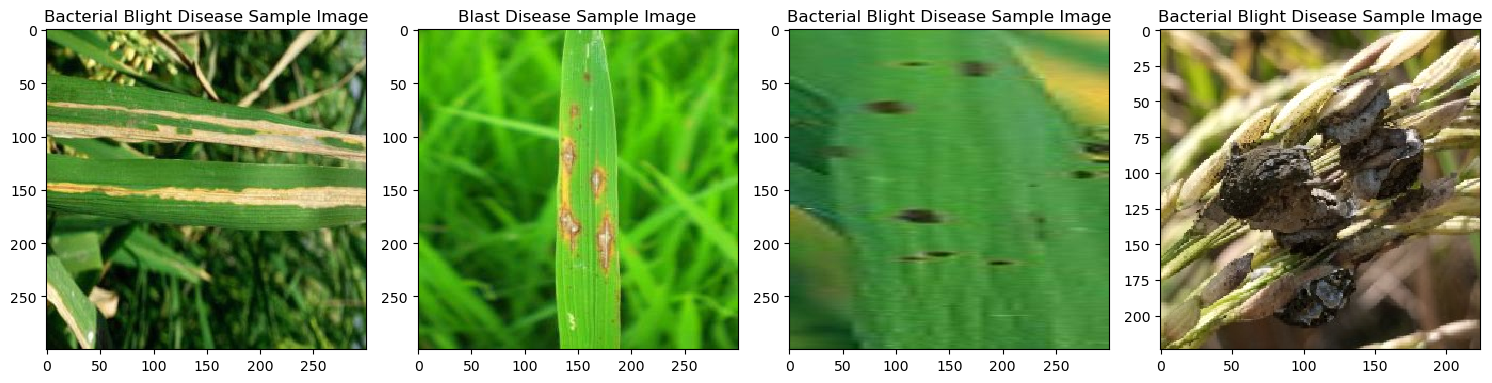

In [5]:
bacterial_sample_image=bacterial_blight[0]
blast_sample_image=blast[0]
brown_spot_sample_image=brown_spot[0]
false_smut_sample_image=false_smut[0]

fig=plt.figure(figsize=(15,8))
fig.add_subplot(1,4,1)
# plt.axis('off')
plt.title('Bacterial Blight Disease Sample Image')
imshow(bacterial_sample_image)

fig.add_subplot(1,4,2)
# plt.axis('off')
plt.title('Blast Disease Sample Image')
imshow(blast_sample_image)

fig.add_subplot(1,4,3)
# plt.axis('off')
plt.title('Bacterial Blight Disease Sample Image')
imshow(brown_spot_sample_image)

fig.add_subplot(1,4,4)
# plt.axis('off')
plt.title('Bacterial Blight Disease Sample Image')
imshow(false_smut_sample_image)

## Preprocess

In [6]:
combined_path_dataset=[]
for path in bacterial_blight:
    combined_path_dataset.append(path)
for path in blast:
    combined_path_dataset.append(path)

for path in brown_spot:
    combined_path_dataset.append(path)

for path in false_smut:
    combined_path_dataset.append(path)





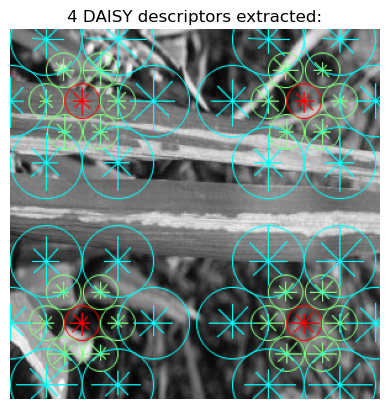

(2, 2, 104)


In [7]:
path=combined_path_dataset[0]
image=imread(path,as_gray=True)
rescaled_image=resize(image,(200,200))
# dasify,daisified_image=daisy(rescaled_image,step=180, radius=58, rings=2, histograms=6, orientations=8, visualize=True)
# fig=plt.figure(figsize=(10,6))
# plt.subplot(1,2,1)
# imshow(rescaled_image)
# plt.subplot(1,2,2)
# imshow(image)
# print(dasify.shape)
descs, descs_img = daisy(
    image, step=180, radius=58, rings=2, histograms=6, orientations=8, visualize=True
)

fig, ax = plt.subplots()
ax.axis("off")
ax.imshow(descs_img)
descs_num = descs.shape[0] * descs.shape[1]
ax.set_title(f"{descs_num} DAISY descriptors extracted:")
plt.show()
print(descs.shape)

In [10]:
daisified_images=[]
for path in combined_path_dataset:
    image=imread(path,as_gray=True)
    resized_image=resize(image,(200,200))
    descs= daisy(resized_image, step=180, radius=58, rings=2, histograms=6, orientations=8)
    daisified_images.append(descs)


In [13]:
print(len(daisified_images))
print(daisified_images[0])

200
[[[0.00626864 0.00919181 0.01431857 0.00997889 0.00604469 0.00879569
   0.01417261 0.01053013 0.00679042 0.00939751 0.014972   0.01089951
   0.00679848 0.00948625 0.01490117 0.010893   0.00484292 0.00747905
   0.01143012 0.00741172 0.0046006  0.00748064 0.01166852 0.00800684
   0.00426819 0.00675898 0.01114377 0.0075359  0.00414168 0.0061368
   0.01026889 0.00758434 0.00529161 0.0082413  0.01305181 0.00894913
   0.00538781 0.00838013 0.01350669 0.00927809 0.00992839 0.01208027
   0.01278402 0.01121755 0.01034171 0.01189702 0.01346696 0.01075515
   0.01167631 0.01158782 0.0134745  0.01334712 0.01092693 0.01052224
   0.01435334 0.01378028 0.00762574 0.00923753 0.01170106 0.00926578
   0.00775551 0.01003158 0.01259706 0.00960372 0.00500651 0.00700691
   0.01042202 0.00778818 0.00521924 0.00656509 0.00912805 0.00696267
   0.00500838 0.00719794 0.01063732 0.00755947 0.0050164  0.00694961
   0.00969908 0.00691564 0.00586786 0.00804627 0.01196379 0.00904283
   0.0060067  0.00830447 0.0124

## Building Dataset and Training Model 